In [1]:
# blab init
import blab
startup_notebook = blab.blab_startup()
%run $startup_notebook

blab init
blab found local libs at /media/me/DATA/Dropbox/31_Projekte/01_Python/libs
Start Time: 17:19:12


time: 389 ms


# Review and visualize
Review and visualize data that meets your criteria. <br>
This notebook raises errors for demonstration purpose.
* `plot`: Plot with seaborn without configuration
* `check_mask`: Count rows filtered by a binary mask. Raises an error, if the number is unexpected.
* `sample`: Returns some sample rows: beginning + end + random rows in the middle, prefering rows without NaNs
* `search_str`: Searches all str columns of a dataframe. Useful for development and debugging.
* `grid`: Visualize with dtale
* `memory_consumption`: Returns the memory consumption of Python objects

In [2]:
import numpy      as np
import pandas     as pd 
#import bpyth      as bpy
import pandasklar as pak 

grid = pak.grid

time: 1.41 s


## plot(): Plot with seaborn without configuration

In [3]:
?pak.plot

time: 71.6 ms


Signature:
pak.plot(
    df1,
    df2=None,
    x='--',
    size=(16, 4),
    palette=('rainbow', 'tab10'),
    line=(1, 1),
)
Docstring:
Plots DataFrames or Series.
* df1, df2: The first two parameters are DataFrames or Series. 
            If there are two, they get separate y-axes.
* x:        Which column contains the x-axis? 
            x=='index' -> The index is used as x.    
            If no x is given, x is tried to be guessed. 
            If no suitable column is found, the index is used as x.
            A column is considered suitable if it is called 'x', 'X' or 'index'.
size:       Width and height of the plot as tuples
palette:    The two palettes as tuple or sting
line:       The line thickness as tuple or number    
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/plot.py
Type:      function


In [4]:
# Several types of random numbers, with parameters
size = 100
a = pak.random_series( size, 'ascending'                    )
b = pak.random_series( size, 'ascending'                    )
c = pak.random_series( size, 'descending'                   )
d = pak.random_series( size, 'descending'                   )
e = pak.random_series( size, 'perlin',     freq=2           )
f = pak.random_series( size, 'perlin',     freq=[16,1,8,1]  )
g = pak.random_series( size, 'perlin',     freq=[4,1,8,128] )

df = pak.dataframe( (a,b,c,d,e,f,g) )
pak.sample(df)

,A,B,C,D,E,F,G
0,0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1,0,0.002093,0.995429,0.998362,-0.066956,0.283586,0.004649
33,0,0.215186,0.358721,0.404341,-0.058444,-0.107647,-0.034740
51,0,0.222754,0.253883,0.309249,-0.274096,-0.260045,0.170364
71,0,0.286602,0.237772,0.231615,-0.999035,-0.415467,0.329075
98,0,0.993966,0.007137,0.002219,-0.063106,-0.533040,0.102653
99,0,1.000000,0.000000,0.000000,-0.031177,-0.290211,0.102317


time: 163 ms


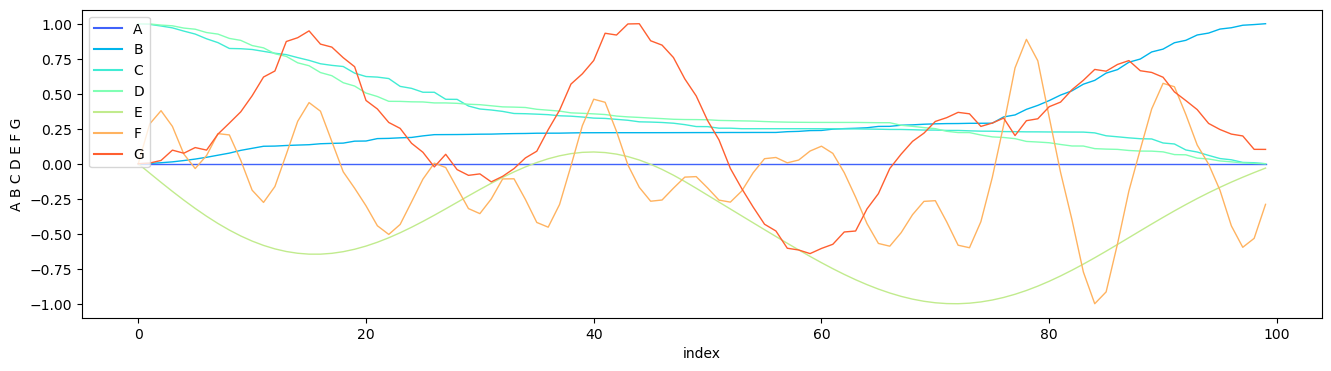

time: 720 ms


In [5]:
# just plot all together
%matplotlib inline
pak.plot(df)

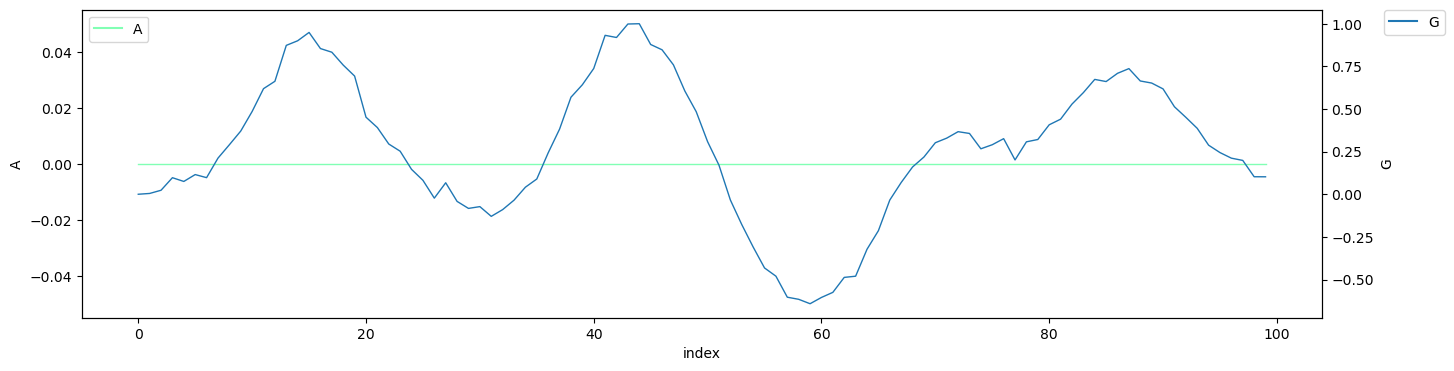

time: 539 ms


In [6]:
# plot 2 Series, use different y-axis
%matplotlib inline
pak.plot(df.A, df.G)

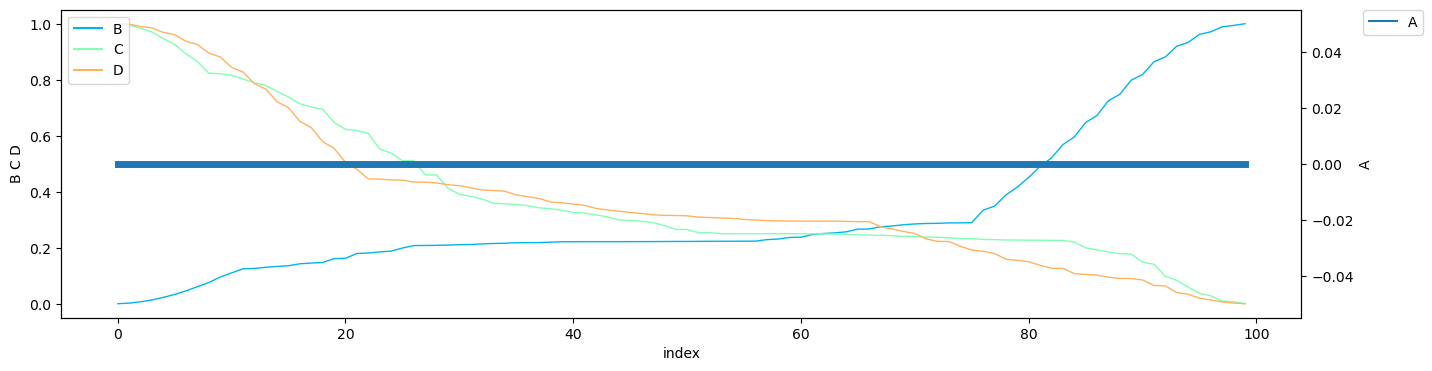

time: 548 ms


In [7]:
# plot DataFrame + Series, use different line thickness
%matplotlib inline 
pak.plot(df[list('BCD')], df.A, line=(1,5))

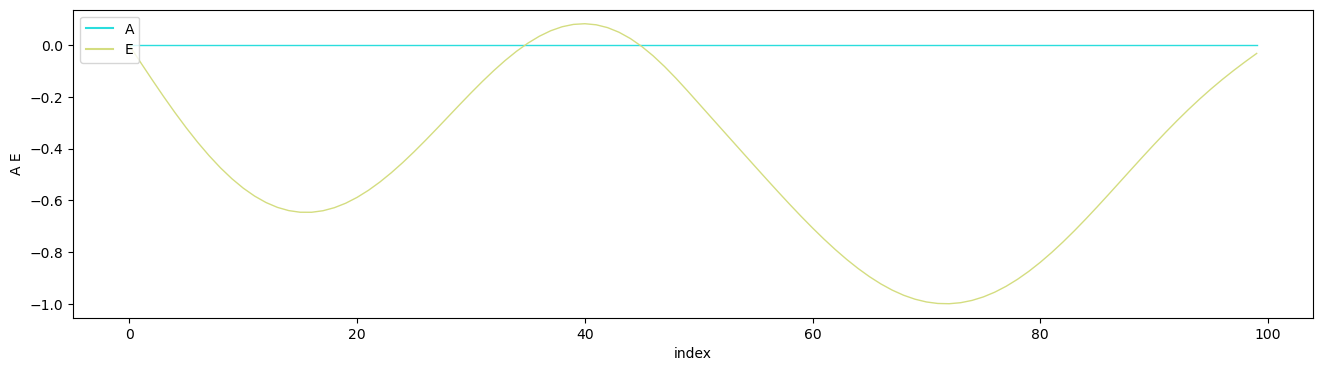

time: 356 ms


In [8]:
# plot E (Perlin) and A (ascending)
%matplotlib inline 
pak.plot(df[list('AE')])

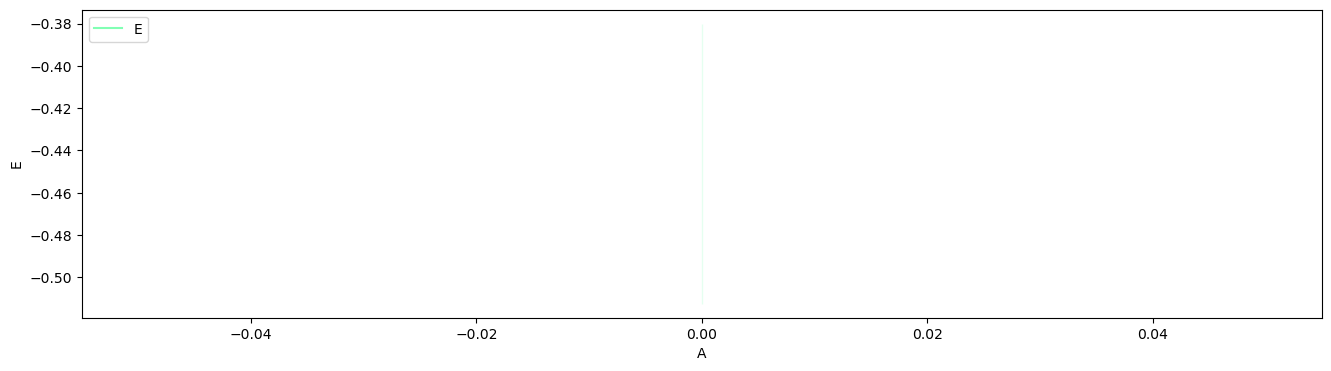

time: 266 ms


In [9]:
# plot E using A as x-Axis
%matplotlib inline 
pak.plot(df[list('AE')], x='A')

## sample(): Returns some sample rows

In [10]:
?pak.sample

time: 33.7 ms


Signature: pak.sample(df, size=7)
Docstring:
Returns some sample rows.
Always the beginning and the end, 
plus some random rows in the middle, prefering rows without NaNs.
* size: Number of rows returned
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/analyse.py
Type:      function


In [11]:
# create test data
df = pak.people()
df['birthplace'] = df.birthplace.fillna('Hamburg')
df

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Reinhard,32,30,57570,Bremen,oh0ÖWTyB,"{r, a, E}","[A, x]"
1,Karina,34,30,52971,Hamburg,4ctäN3i,"{H, w, 0, g, o}","[A, B, C]"
2,Theresa,32,30,78538,Hamburg,ukRÄ6K,{v},"[A, A, A]"
3,Lilli,35,30,52427,Hamburg,86h26,{X},"[A, C, C, B]"
4,Max,41,40,<NA>,Berlin,oz83Akz,"{X, j, Q, N}","[A, B, C, C]"
...,...,...,...,...,...,...,...,...
95,Lukas,28,20,75491,Bremen,ä9d34Yüoqä,"{l, 4, R, C}","[a, b, c]"
96,Stefanie,35,30,82570,Bremen,rLb31BtrID,"{b, d, C}","[A, x]"
97,Nikolas,30,30,65493,Hamburg,WuHRQFCdoW,"{4, E}","[b, b, a, b]"
98,Heinrich,32,30,72380,Berlin,e8Gy7veÜ,{J},"[b, b, a, b]"


time: 111 ms


In [12]:
pak.sample(df)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Reinhard,32,30,57570,Bremen,oh0ÖWTyB,"{r, a, E}","[A, x]"
1,Karina,34,30,52971,Hamburg,4ctäN3i,"{H, w, 0, g, o}","[A, B, C]"
2,Theresa,32,30,78538,Hamburg,ukRÄ6K,{v},"[A, A, A]"
15,Marianne,31,30,20782,Hamburg,JÜrMeYu,"{4, E}","[A, B, C, C]"
34,Emilie,22,20,28635,Bremen,ZörkoEr,"{G, X}","[c, b, a]"
98,Heinrich,32,30,72380,Berlin,e8Gy7veÜ,{J},"[b, b, a, b]"
99,Jennifer,36,30,23466,Bremen,jpTmtbsD7,"{H, Y, J, n}","[A, C, C, B]"


time: 58.4 ms


## search_str(): Searches all str columns of a dataframe

In [13]:
?pak.search_str

time: 54.6 ms


Signature: pak.search_str(df, find, without=[])
Docstring:
Searches all str columns of a dataframe.
Useful for development and debugging.
* find:    What is to be found?                  String or list of strings.
* without: Which columns should not be searched? String or list of strings.    
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [14]:
# create mask: most frequent first_name
find = ['Hamburg', pak.most_freq_elt(df.first_name)]
print('search for',find)

search for ['Hamburg', 'Anna']
time: 40.3 ms


In [15]:
pak.search_str(df, find)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
1,Karina,34,30,52971,Hamburg,4ctäN3i,"{H, w, 0, g, o}","[A, B, C]"
2,Theresa,32,30,78538,Hamburg,ukRÄ6K,{v},"[A, A, A]"
3,Lilli,35,30,52427,Hamburg,86h26,{X},"[A, C, C, B]"
7,Beate,28,20,68992,Hamburg,WqwäSWä7lv,"{O, t, o, M}","[a, b, c]"
9,Paul,25,20,77799,Hamburg,OCÄBü,"{k, L, 3, v, 0}","[c, b, a]"
12,Philip,30,30,43882,Hamburg,dnWNo,"{3, W, d}","[a, b, c]"
14,Werner,27,20,46484,Hamburg,z1OlQaA,"{F, b, Z, s, u}","[A, C, C, B]"
15,Marianne,31,30,20782,Hamburg,JÜrMeYu,"{4, E}","[A, B, C, C]"
18,Bernhard,26,20,82570,Hamburg,0t5RR64Sad,"{S, i, Y, K, M}","[A, x]"
26,Käthe,34,30,85455,Hamburg,rZ1yaONgT,"{U, s, R, m}","[c, b, a]"


time: 124 ms


## check_mask(): Count rows filtered by a binary mask

In [16]:
?pak.check_mask

time: 47.8 ms


Signature:
pak.check_mask(
    df,
    mask,
    expectation_min=None,
    expectation_max=None,
    msg='',
    stop=True,
    verbose=None,
)
Docstring:
Count rows filtered by a binary mask.
Raises an error, if the number is unexpected.

Examples:
check_mask( df, mask )         # just show the number of rows   
check_mask( df, mask, 2000 )   # checks for about 2000 rows (if not 0: not more than double, not less than half)
check_mask( df, mask, 0 )      # checks for exactly 0 rows    
check_mask( df, mask, 10, 50)  # checks for 10..50 rows

Example with later raise:
error = check_mask(df, mask, 214, stop=False)        
grid(df, mask, error)        
bpy.raise_if(error)
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [17]:
# define mask
mask = (df.age >= 30)  &  (df.age < 40) 
#df[mask]

time: 33.2 ms


In [18]:
# just show the number of rows
pak.check_mask(df, mask)

 59 rows
time: 51.7 ms


In [19]:
# checks for about 50 rows
pak.check_mask(df, mask, 50)

time: 33.8 ms


In [20]:
# checks for about 50 rows
pak.check_mask(df, mask, 50, verbose=True)

 59 rows
time: 40.1 ms


In [21]:
# checks for 0..100 rows
pak.check_mask(df, mask, 0, 100)

time: 41.3 ms


## grid(): Visualize with dtale

In [22]:
?grid

time: 29.9 ms


Signature: grid(df, mask=None, error='€€€', color='blue', **kwargs)
Docstring:
Visualization of a DataFrame using dtale.
* df:     DataFrame to show
* mask:   Binary mask of function to reduce the number of rows
* error:  Error message
* color:  Color of the error message.
* kwargs: Options for dtale. See https://github.com/man-group/dtale#instance-settings
          Caution: This will affect all grids in this notebook...
dtale may not work in a multiscreen setting on windows.

=== Examples ===
grid(df)                        # show all rows
grid(df,mask)                   # show with binary mask    
grid(df,sample)                 # show with functionally mask

=== For error indication after check_mask ===
error = check_mask(df, mask, 900, stop=False)
grid(df, mask, error) 
and later: raise_if(error)
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [23]:
# show
grid(df)

100 rows


time: 251 ms


### grid(): Use mask

In [24]:
# Function as mask
grid(df, pak.sample)

7 rows out of 100


time: 231 ms


In [25]:
# Binary mask
mask = df.age > 25
grid(df, mask)

86 rows out of 100


time: 166 ms


### grid() options
Some grid options are global, e.g. max_column_width. If you set this option to a value later in your notebook, all grids in the notebook are rendered with this column_width. If you find a way to change this, send me a message.

In [26]:
# global Settings
pak.set_grid(max_column_width=200)

time: 63.3 ms


In [27]:
# show 
grid(df)

100 rows


time: 161 ms


### grid(): Advanced Formating
See options on https://github.com/man-group/dtale#instance-settings

In [28]:
mask = df.age > 25
grid(df, mask, sort=[('first_name','ASC')], background_mode='heatmap-col-age')
#grid(df, mask, drop_index=True,)

86 rows out of 100


time: 133 ms


### grid(): Special cases

In [29]:
# No DataFrame
grid(None)

Nothing to show
time: 47.8 ms


In [30]:
# Empty DataFrame
d = pd.DataFrame()
grid(d)

No rows
time: 46.9 ms


In [31]:
# 100% filtered 
mask = df.age > 1000
grid(df,mask)

No rows, mask filters them all away
time: 51.2 ms


In [32]:
# 100% filtered, and this is good
mask = df.age > 1000
grid(df,mask, color='green')

No rows, mask filters them all away
time: 49.6 ms


In [33]:
# 100% filtered, and this is bad
mask = df.age > 1000
grid(df,mask, color='red')

No rows, mask filters them all away
time: 52.9 ms


### grid() & check_mask(): Show error rows and raise later

In [34]:
# define a mask that contains errors
# say our error is df.birthplace == 'Hamburg',
# we don't want that to happen,
# but if it happens we would like to see the rows
mask = df.birthplace == 'Hamburg'
pak.check_mask(df,mask)

 29 rows
time: 45.8 ms


In [35]:
# checking for 0 raises an error, as we want.
# But we don't see the rows affected
pak.check_mask(df,mask, 0)

Exception: ERROR: 29 rows, but it should be a maximum of 0

time: 1.03 s


In [36]:
# so we use this to show the error rows first
error = pak.check_mask(df,mask, 0, stop=False)
grid(df, mask, error) 

ERROR: 29 rows, but it should be a maximum of 0
29 rows out of 100


time: 111 ms


In [37]:
# and raise later
bpy.raise_if(error)

Exception: ERROR: 29 rows, but it should be a maximum of 0

time: 109 ms


## memory_consumption

In [38]:
?pak.memory_consumption

time: 50 ms


Signature: pak.memory_consumption(iteration_of_objects, limit=10, use_rtype=True)
Docstring:
Returns the memory consumption of Python objects.
* iteration_of_objects: can be e.g. a DataFrame or just locals()
* limit: Limits the output size
* use_rtype: Use rtype instead of type?

For the memory consumption of the biggest 10 local variables call:
bpy.memory_consumption( locals() )
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/analyse.py
Type:      function


In [39]:
# All local variables
r = pak.memory_consumption( locals() )
r

,name,rtype,size
0,df,"(DataFrame, Series)",58.7 KB
1,_11,"(DataFrame, Series)",58.7 KB
2,_15,"(DataFrame, Series)",18.8 KB
3,_12,"(DataFrame, Series)",4.1 KB
4,Stop,"(type,)",1.0 KB
5,Markdown,"(type,)",1.0 KB
6,HTML,"(type,)",1.0 KB
7,a,"(Series, int)",944.0 B
8,b,"(Series, float)",944.0 B
9,c,"(Series, float)",944.0 B


time: 98.2 ms


In [41]:
# If you give a DataFrame, it will return the column sizes
pak.memory_consumption( df )

,name,rtype,size
0,features,"(Series, set, str)",30.5 KB
1,secret,"(Series, str)",8.2 KB
2,history,"(Series, list, str)",7.1 KB
3,birthplace,"(Series, str)",6.3 KB
4,first_name,"(Series, str)",6.3 KB
5,postal_code,"(Series, int32)",644.0 B
6,age,"(Series, int8)",344.0 B
7,age_class,"(Series, int8)",344.0 B


time: 33.9 ms
